# CS524 HW4 Duality

## Q1.Max-flow to min-cost.

### a). 

First we have to label all the nodes in this graph.  
So my labels are:  

a b d f g  
  c e 


\begin{align}
\underset{x}{\text{max}} \qquad& c^Tx  \\
\text{subject to:} \qquad& Ax = b \\ 
\qquad& p \leq x \leq q
\end{align}

$\mathbf{x} = \pmatrix{x_{ab} \\ x_{ac} \\x_{bd}\\x_{cd} \\ x_{df} \\x_{ce} \\ x_{eg} \\x_{fg} \\x_{ga}} $; 
$\mathbf{A} = 
\pmatrix{1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & -1 \\
-1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & -1 & 1 }$ ;
$ p = \pmatrix{0\\0\\0\\0\\0\\0\\0\\0\\0}$;
$q = \pmatrix{3\\2\\1\\4\\3\\2\\3\\2\\ \infty}$

### b).

\begin{align}
\underset{x}{\text{min}} \qquad& c^Tx  \\
\text{subject to:} \qquad& A\mu + x = b \\ 
\qquad& \mu \in \{0,1\} \\
\qquad& x \geq p
\end{align}

$
x = \pmatrix{x_{ab} \\ x_{ac} \\x_{bd}\\x_{cd} \\ x_{df} \\x_{ce} \\ x_{eg} \\x_{fg} }; \mu = \pmatrix{\mu_{a} \\\mu_{b}\\\mu_{c} \\ \mu_{d} \\\mu_{e} \\ \mu_{f} \\\mu_{g} }
$  
$
c = \pmatrix{3\\2\\1\\4\\3\\2\\3\\2\\}; 
A = \pmatrix{1 & -1 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & -1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 0 & -1 & 0 \\
0 & 0 & 1 & 0 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & -1 \\
0 & 0 & 0 & 0 & 0 & 1 & -1 \\
-1 & 0 & 0 & 0 & 0 & 0 & 1};
b = \pmatrix{0\\0\\0\\0\\0\\0\\0\\0\\1};
p = \pmatrix{0\\0\\0\\0\\0\\0\\0\\0\\0}
$




### c).

The minimum of the cut in the graph is 3.  
In path1 a-b-d-f-g, the min cut is 1; In path2 a-c-e-g, the min cut is 2; In path3 a-c-d-f-g, that is 2;
So the maximum flow is the min cut 1+2 = 3;  
The capacity constraint values $\lambda_{ij}$ are non-negative, and the nodal balance constraints $\mu$ is either 0 or 1.  
The $\mu_g$ here is 1. In a certain path, if an edge $pq$ is chosen, the corresponding $\lambda_{pq}$ will be 1, otherwise 0;

## Q2.Dual interpretation.

### a).

\begin{align}
\underset{p,q,r,s}{\text{minimize}} \qquad& p + q + r + s\\
\text{subject to:}\qquad& p - r = \cos(t) && \text{(constraint 1)}\\ 
\text{subject to:}\qquad& q - s = \sin(t) && \text{(constraint 2)}\\ 
\text{subject to:}\qquad& p,q,r,s \ge 0 && \text{(constraint 3)}\\
\end{align}

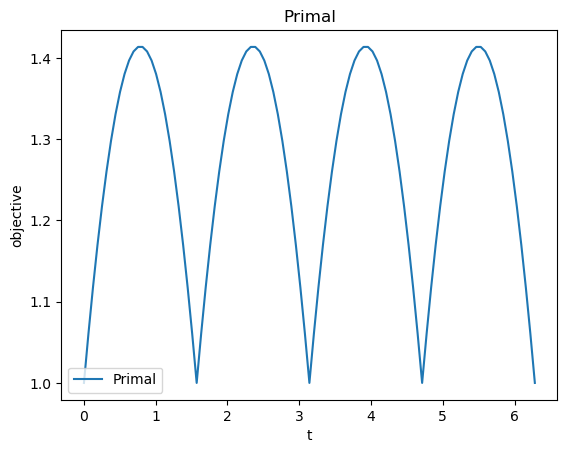

In [1]:
using JuMP, Clp

# *******************************************
# define t
Nt = 101;
step_length = 1/(Nt-1);
t = (0:step_length:1);
t = t .* (2*pi);
# *******************************************

opt = zeros((Nt,1));
for i = 1 : Nt
    m2a = Model(with_optimizer(Clp.Optimizer));
    set_silent(m2a);
    @variable(m2a, p >= 0);
    @variable(m2a, q >= 0);
    @variable(m2a, r >= 0);
    @variable(m2a, s >= 0);
    
    @constraint(m2a, p - r == cos(t[i]));
    @constraint(m2a, q - s == sin(t[i]));
    
    @objective(m2a, Min, p + q + r + s);
    optimize!(m2a);
    
    opt[i] = objective_value(m2a);
end


using PyPlot;
figure();
plot(t,opt, label = "Primal");
xlabel("t");
ylabel("objective");
legend();
title("Primal");

### b).

\begin{align}
\underset{\lambda_1, \lambda_2}{\text{maximize}} \qquad& （\lambda_1-1）\cos(t) + （\lambda_2-1）\sin(t)  \\
\text{subject to:}\qquad& \lambda_1 \le 2 && \text{(constraint 1)}\\ 
\text{subject to:}\qquad& \lambda_2 \le 2 && \text{(constraint 2)}\\ 
\text{subject to:}\qquad& \lambda_1 , \lambda_2 \ge 0 && \text{(constraint 3)}\\ 
\end{align}

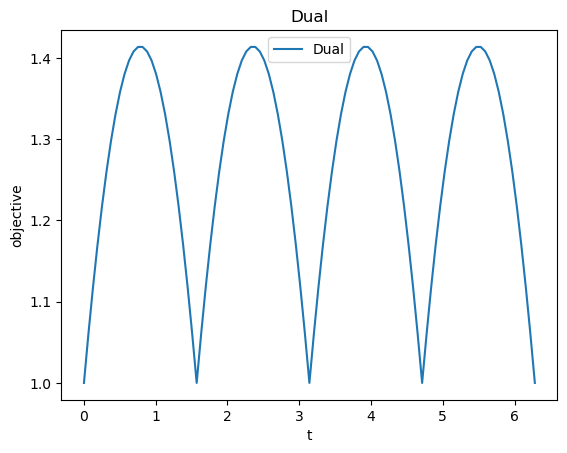

In [12]:
opt2 = zeros((Nt,1));
for i = 1 : Nt
    m2b = Model(with_optimizer(Clp.Optimizer));
    set_silent(m2b);
    #=
    @variable(m2b, lambda1 <= 2);
    @variable(m2b, lambda2 <= 2);
    
    
    @constraint(m2b, lambda1>=0);
    @constraint(m2b, lambda2>=0);
    
    @objective(m2b, Max, (lambda1 -1) * cos(t[i]) + (lambda2 -1) * sin(t[i]));
    =#
    
    @variable(m2b, lambda1 <= 1);
    @variable(m2b, lambda2 <= 1);
    
    
    @constraint(m2b, lambda1>=-1);
    @constraint(m2b, lambda2>=-1);
    
    @objective(m2b, Max, (lambda1) * cos(t[i]) + (lambda2) * sin(t[i]));
    optimize!(m2b);
    
    opt2[i] = objective_value(m2b);
end

figure();
plot(t,opt2, label = "Dual");
xlabel("t");
ylabel("objective");
legend();
title("Dual");



### They are the same.

## Q3.Electricity grid with storage.

In [3]:
## first calculate the original cost
time = Array(1:24);
demand = [43 40 36 36 35 38 41 46 49 48 47 47 48 46 45 47 50 63 75 75 72 66 57 50]';
cost = zeros(24,1);
for i = 1: (length(cost))
    cost[i] = min(demand[i],50) * 100 + max(0, (demand[i] -50)) * 400;
end
origin_total_cost = sum(cost)

152400.0

### a).

The objective is to minimize the cost of the electricity.  
The decision variable is the power of the battery at any time.   
The constraints are the maximum of the power in battery never exceeds 30 and never becomes negative.  
The consumption of electricity will not exceed 75.

variables: battery[24] power_buy[24] cost[i]  
constraints:   
battery[i] >= 0, power_buy[i] = battery[i] - battery[i-1] + demand[i]  
0 <= battery[i] <= 30  
power_buy[i] <= 75  
cost[i] <= power_buy[i] * 100  
cost[i] <= (power_buy[i] -50) * 400 + 50 * 100  
objective: maximize the sum(cost)

In [4]:
using Clp, JuMP
m3a = Model(with_optimizer(Clp.Optimizer));
set_silent(m3a);
# the power into(+) the battery
battery = @variable(m3a, [1:length(demand)]); ## current energy in battery
cost_w_batt = @variable(m3a, [1:length(demand)]); ## cost when using a battery
power_buy = @variable(m3a, [1:length(demand)]); ## hourly bought electricity
battery_power = @variable(m3a, [1:length(demand)]); ## power from battery; if positive, it means the battery is charged

@constraint(m3a, battery[1] == battery_power[1]);
#@constraint(m3a, battery[1] == 0);

for i = 1:length(demand)
    #@constraint(m3a, battery[i] +  battery_power[i] >= 0);
    @constraint(m3a, battery[i] >= 0);
    @constraint(m3a, battery[i] <= 30);
    @constraint(m3a, cost_w_batt[i] >= 0);    
   
    @constraint(m3a, (-battery_power[i] + power_buy[i] == demand[i]));    
    
    @constraint(m3a, cost_w_batt[i] >= power_buy[i] * 100);
    @constraint(m3a, cost_w_batt[i] >= (power_buy[i]-50) * 400 + 100 * 50);
    @constraint(m3a, power_buy[i] <= 75);    
end

for i = 2:length(demand)    
    @constraint(m3a, battery[i] == battery[i-1] + battery_power[i]);
end

@objective(m3a, Min, sum(cost_w_batt));

optimize!(m3a)

battery_total_cost = objective_value(m3a);

In [5]:
println("The saved cost is -> \$", round.(origin_total_cost - battery_total_cost, digits =3));

The saved cost is -> $9000.0


### b).

In [6]:
using Clp, JuMP
m3b = Model(with_optimizer(Clp.Optimizer));
set_silent(m3b);

battery_b = @variable(m3b, [1:length(demand)]); ## current energy in battery
cost_w_batt_b = @variable(m3b, [1:length(demand)]); ## cost when using a battery
power_buy_b = @variable(m3b, [1:length(demand)]); ## hourly bought electricity
battery_power_b = @variable(m3b, [1:length(demand)]); ## power from battery; if positive, it means the battery is charged

#@constraint(m3b, battery_b[1] == 0);
@constraint(m3b, battery_b[1] == battery_power_b[1]);

for i = 1:length(demand)
    #@constraint(m3b, battery_b[i] +  battery_power_b[i] >= 0); 
    @constraint(m3b, battery_b[i] >= 0);
    #@constraint(m3b, battery_b[i] <= 30);
    @constraint(m3b, cost_w_batt_b[i] >= 0);    
   
    @constraint(m3b, (-battery_power_b[i] + power_buy_b[i] == demand[i]));    
    
    @constraint(m3b, cost_w_batt_b[i] >= power_buy_b[i] * 100);
    @constraint(m3b, cost_w_batt_b[i] >= (power_buy_b[i]-50) * 400 + 100 * 50);
    @constraint(m3b, power_buy_b[i] <= 75);    
end

for i = 2:length(demand)    
    @constraint(m3b, battery_b[i] == battery_b[i-1] + battery_power_b[i]);
end

@objective(m3b, Min, sum(cost_w_batt_b));

optimize!(m3b)

battery_total_cost_b = objective_value(m3b);

In [7]:
println("The saved cost is -> \$", round(origin_total_cost - battery_total_cost_b, digits = 3));

The saved cost is -> $32400.0


In [8]:
println("The maximum capacity is -> ", round.(maximum(value.(battery_b)), digits = 3), "MWh");

The maximum capacity is -> 108.0MWh


#### Question: Should you use Duality here?

I think I should use duality here. If we don't have a constraint on the capacity of a battery, it means we can reduce a variable in the duality problem compared with that when we do have the capacity constraint.

### c).

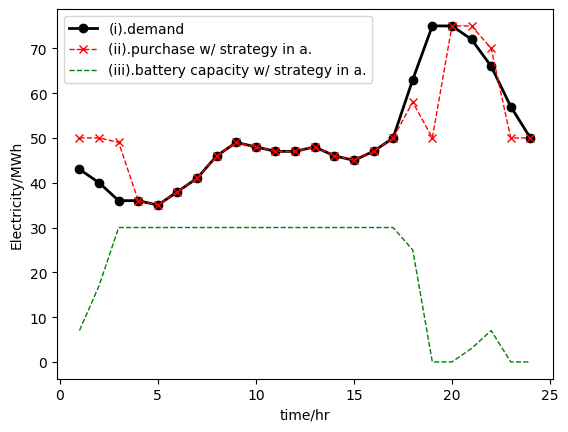

In [9]:
using PyPlot;
wid = 2;

figure();
plot(time,demand, label = "(i).demand","-o",c = "k", linewidth = wid);
plot(time,value.(power_buy), label = "(ii).purchase w/ strategy in a.",  "--x", linewidth = wid * 0.5, c = "r");
plot(time,value.(battery), label = "(iii).battery capacity w/ strategy in a.", c = "green", "--", linewidth = wid * 0.5);
xlabel("time/hr");
ylabel("Electricity/MWh");
legend();

### To zoom in the capacity of battery

In [11]:
#=
fig = figure();
ax1 = fig.add_subplot(111);
ax1.plot(time,demand, label = "(i).demand","-o",c = "k", linewidth = wid);
ax1.plot(time,value.(power_buy), label = "(ii).purchase w/ strategy in a.",  "--x", linewidth = wid * 0.5, c = "r");

ax1.set_ylabel("electricity/MWh");
ax1.set_xlabel("time/hr");


ax2 = ax1.twinx();
ax2.plot(time,value.(battery), label = "(iii).battery capacity w/ strategy in a.", c = "green", "--", linewidth = wid * 0.5);
ax2.set_ylabel("Battery capacity/MWh");
ax1.set_xlabel("time/hr");

ax1.legend();
ax2.legend();
title("plot of question c");
#=



LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#